In [95]:
 import json
 import geopandas as gpd
 import pandas as pd
 import matplotlib.pyplot as plt
 from shapely.geometry import Point,Polygon



In [96]:
class Departamento:
    def __init__(self,nombreDepartamento):
        self.provincias = []
        self.nombreDepartamento = nombreDepartamento
    def addProvincias(self,provincias):
        self.provincias = provincias
       
class Provincia:
    def __init__(self,nombreProvincia):
        self.distritos = []
        self.nombreProvincia = nombreProvincia
    def addDistritos(self,distritos):
        self.distritos = distritos

class Distrito:
    def __init__(self,nombreDistrito):
        self.nombreDistrito = nombreDistrito
        self.centrosPoblados = []     

    def addCentrosPoblados(self,centrosPoblados):
        self.centrosPoblados = centrosPoblados

class CentroPoblado:
    def __init__(self,latitud,longitud,viviendas,poblacion,distrito,provincia,departamento,nombreCentroPoblado):
        self.latitud = latitud
        self.longitud = longitud            
        self.viviendas = viviendas            
        self.poblacion = poblacion
        self.distrito = distrito
        self.provincia = provincia
        self.nombreCentroPoblado = nombreCentroPoblado
        self.departamento = departamento
        #self.Point = Point(self.longitud,self.latitud)            
    def __str__(self):
        return str(self.__dict__)
    def to_dict(self):
        return {
            'latitud': self.latitud,
            'longitud':self.longitud,
            'viviendas':self.viviendas,
            'poblacion':self.poblacion,
            'distrito':self.distrito,
            'provincia':self.provincia,
            'departamento':self.departamento,
            'nombreCentroPoblado':self.nombreCentroPoblado        
            }


def loadDepartamentos(data):
    ListOfDepartamentos = []
    for i in data:
        ListOfDepartamentos.append(i['DEPARTAMENTO'])
    SetOfDepartamentos = set(ListOfDepartamentos)
    Departamentos = []
    for i in SetOfDepartamentos:
        Departamentoguardar = Departamento(i)
        Departamentos.append(Departamentoguardar)
    return Departamentos


def loadProvincias(departamentos,data):
    Provincias = []
    for i in departamentos:
        listOfProvincias = []
        for j in data:
            if(i.nombreDepartamento == j['DEPARTAMENTO']):
                provinciaGuardar = j['PROVINCIA']
                listOfProvincias.append(provinciaGuardar)
        setOfProvincias = set(listOfProvincias)
        i.addProvincias(list(setOfProvincias))
    
    for i in departamentos:
        addingPronvicias = []
        for j in i.provincias:
            j = Provincia(j)
            addingPronvicias.append(j)
        i.addProvincias(addingPronvicias)
        
def loadDistritos(departamentos,data):
    Distritos = []
    for i in departamentos:
        for k in i.provincias:
            listOfDistricts = []
            for j in data:
                if(k.nombreProvincia == j['PROVINCIA']):
                    distritoGuardar = j['DISTRITO']
                    listOfDistricts.append(distritoGuardar)
                setOfDistricts = set(listOfDistricts)
                k.addDistritos(list(setOfDistricts))
    
    for i in departamentos:
        for k in i.provincias:
            addingDistrito = []
            for j in k.distritos:
                j = Distrito(j)
                addingDistrito.append(j)
            k.addDistritos(addingDistrito)
    

def loadCentroPoblado(Departamentos,data):
    centrosPoblados = []
    for i in data:
        CentroPobladoGuardar = CentroPoblado(i['LATITUD'],i['LONGITUD'],i['VIVIENDAS'],i['POBLACIï¿½N'],i['DISTRITO'],i['PROVINCIA'],i['DEPARTAMENTO'],i['CENTRO POBLADO'])
        centrosPoblados.append(CentroPobladoGuardar)
    
    for i in Departamentos:
        for j in i.provincias:
            for k in j.distritos:
                centrosPobladosguardar = []
                for z in centrosPoblados:
                    if(k.nombreDistrito == z.distrito and j.nombreProvincia == z.provincia and i.nombreDepartamento == z.departamento):
                        centrosPobladosguardar.append(z)
                k.addCentrosPoblados(centrosPobladosguardar)

In [97]:
def loadMapa(Departamentos):
    street_map = gpd.read_file("departamentos/DEPARTAMENTOS.shp")
    
    df = pd.DataFrame.from_records([centro.to_dict() for centro in Departamentos])
    crs = {'init':'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df['longitud'],df['latitud'])]
    geo_df = gpd.GeoDataFrame(df,crs = crs, geometry = geometry)
    fig,ax = plt.subplots(figsize=(15,15))
    street_map.plot(ax = ax,alpha = 0.4, color="grey")
    geo_df.plot(ax = ax,markersize = 20,color = "blue",marker = "o", label="centro poblado")
    plt.legend(prop={'size':15})
    


D:\Python\envs\test_python\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


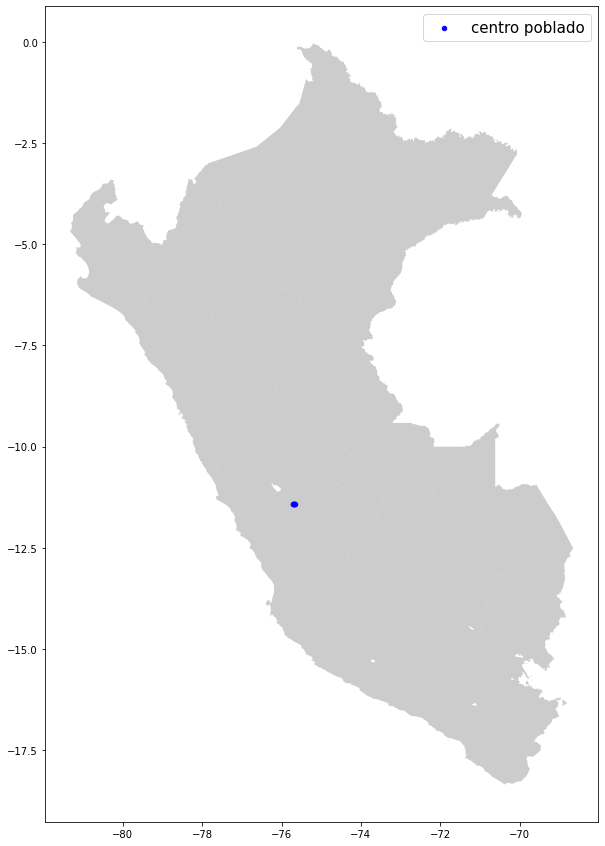

In [98]:
def LoadData():
    f = open('D:\Proyectos\Complejidad\TrabajoParcial\Data.json',)
    data = json.load(f)
    f.close()
    
    Departamentos = loadDepartamentos(data)
    loadProvincias(Departamentos,data)
    loadDistritos(Departamentos,data)
    loadCentroPoblado(Departamentos,data)
    loadMapa(Departamentos[1].provincias[0].distritos[0].centrosPoblados)
    
LoadData()